## Exploratory Data Analysis (EDA)

This notebook explores the telecom customer dataset to understand customer behavior,
identify key patterns related to churn, and inform feature engineering and modeling decisions.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [28]:
telco = pd.read_csv("telco_TS.csv")
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,State,StateNextMonth
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No Churn,No Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No Churn,No Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Churn,No Churn
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No Churn,No Churn
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Churn,Churn


In [29]:
telco.shape

(7043, 22)

In [30]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [31]:
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [32]:
# Renaming Churn 

telco.rename(columns={"StateNextMonth": "Churn"}, inplace=True)

telco["Churn"].value_counts()

Churn
No Churn    4381
Churn       2662
Name: count, dtype: int64

In [34]:
#Check Missing Values

telco.isnull().sum().sort_values(ascending=False)

customerID          0
gender              0
State               0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
OnlineBackup        0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
Churn               0
dtype: int64

In [38]:
# Fix TotalCharges
telco["TotalCharges"] = pd.to_numeric(telco["TotalCharges"], errors="coerce")

telco["TotalCharges"].isnull().sum()


np.int64(0)

In [ ]:
telco = telco.dropna(subset=["TotalCharges"])

### Churn Distribution

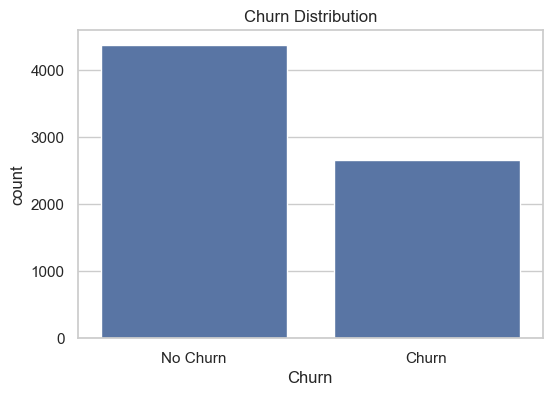

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=telco)
plt.title("Churn Distribution")
plt.show()

### Contract Type vs Churn

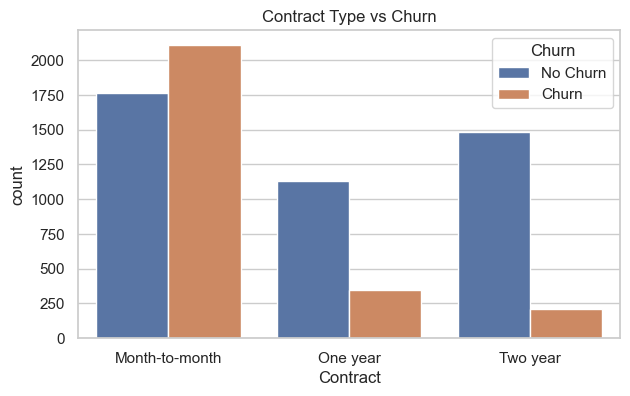

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(x="Contract", hue="Churn", data=telco)
plt.title("Contract Type vs Churn")
plt.show()

### Tenure vs Churn

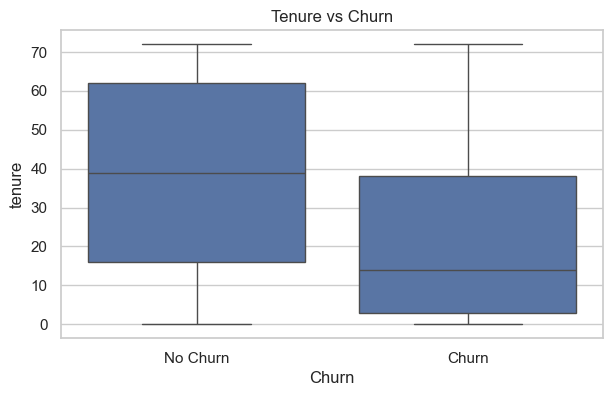

In [46]:
plt.figure(figsize=(7,4))
sns.boxplot(x="Churn", y="tenure", data=telco)
plt.title("Tenure vs Churn")
plt.show()

### Monthly Charges vs Churn

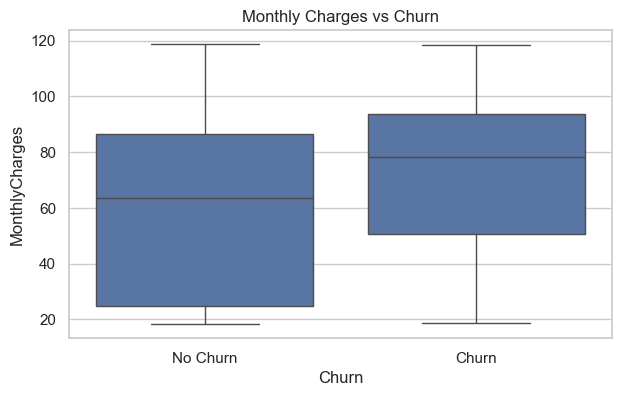

In [48]:
plt.figure(figsize=(7,4))
sns.boxplot(x="Churn", y="MonthlyCharges", data=telco)
plt.title("Monthly Charges vs Churn")
plt.show()